In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import joblib

import metrics_summary as ms

In [5]:
np.random.seed(170)

In [6]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/y_test.csv").values.ravel()

## Load all models

In [7]:
knn = joblib.load("knn.pkl")
knn_os = joblib.load("knn_os.pkl")
sgd = joblib.load("sgd.pkl")
sgd_cs = joblib.load("sgd_cs.pkl")
sgd_os = joblib.load("sgd_os.pkl")
dt = joblib.load("dt.pkl")
dt_cs = joblib.load("dt_cs.pkl")
dt_os = joblib.load("dt_os.pkl")
rf = joblib.load("rf.pkl")
rf_cs = joblib.load("rf_cs.pkl")
rf_os = joblib.load("rf_os.pkl")
xgb = joblib.load("xgb.pkl")
xgb_os = joblib.load("xgb_os.pkl")

## Plot ROC Curve of All Models

KNN
KNN (SMOTE)
Stochastic Gradient Descent
Stochastic Gradient Descent (Cost-Sensitive Learning)
Stochastic Gradient Descent (SMOTE)
Decision Trees
Decision Trees (Cost-Sensitive Learning)
Decision Trees (SMOTE)
Random Forest
Random Forest (Cost-Sensitive Learning)
Random Forest (SMOTE)
XGBoost
XGBoost (SMOTE)


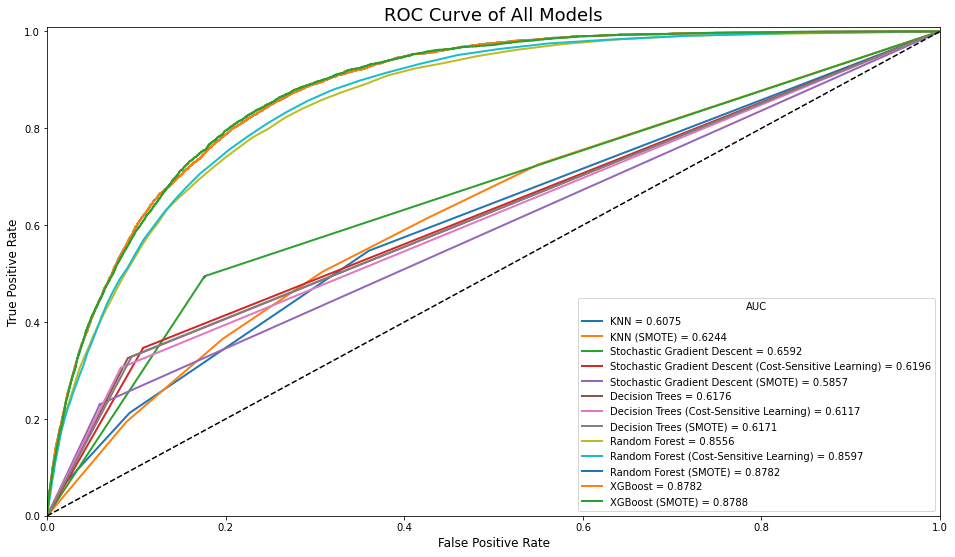

In [13]:
models = [
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'KNN (SMOTE)',
    'model': knn_os,
},
{
    'label': 'Stochastic Gradient Descent',
    'model': sgd,
},
{
    'label': 'Stochastic Gradient Descent (Cost-Sensitive Learning)',
    'model': sgd_cs,
},
{
    'label': 'Stochastic Gradient Descent (SMOTE)',
    'model': sgd_os,
},
{
    'label': 'Decision Trees',
    'model': dt,
},
{
    'label': 'Decision Trees (Cost-Sensitive Learning)',
    'model': dt_cs,
},
{
    'label': 'Decision Trees (SMOTE)',
    'model': dt_os,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Random Forest (Cost-Sensitive Learning)',
    'model': rf_cs,
},
{
    'label': 'Random Forest (SMOTE)',
    'model': rf_os,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'XGBoost (SMOTE)',
    'model': xgb_os,
},
]

# Below for loop iterates through your models list
fig, ax = plt.subplots(figsize=(16, 9))
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label='%s = %0.4f' % (m['label'], roc_auc), linewidth=2)
    print(m['label'])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curve of All Models', fontsize=18)
ax.legend(loc="lower right", title="AUC")
plt.show()   # Display